In [23]:
import pandas as pd
import numpy as np
data=pd.read_csv("diabetes.csv",delimiter=',')
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [24]:
print(data.shape)
print(data.head(10))

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     

In [29]:
x=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].values
print(x[0:11])

[[148.   72.   35.    0.   33.6]
 [ 85.   66.   29.    0.   26.6]
 [183.   64.    0.    0.   23.3]
 [ 89.   66.   23.   94.   28.1]
 [137.   40.   35.  168.   43.1]
 [116.   74.    0.    0.   25.6]
 [ 78.   50.   32.   88.   31. ]
 [115.    0.    0.    0.   35.3]
 [197.   70.   45.  543.   30.5]
 [125.   96.    0.    0.    0. ]
 [110.   92.    0.    0.   37.6]]


In [30]:

y=data[['Outcome']].values
print(y[0:11])

[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]


In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(x[:, [0,1]])
x[:,[0,1]] = imputer.transform(x[:, [0,1]])
print("After filling missing value by mean")
print(x)


After filling missing value by mean
[[148.   72.   35.    0.   33.6]
 [ 85.   66.   29.    0.   26.6]
 [183.   64.    0.    0.   23.3]
 ...
 [121.   72.   23.  112.   26.2]
 [126.   60.    0.    0.   30.1]
 [ 93.   70.   31.    0.   30.4]]


In [32]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x=scalar.fit_transform(x)


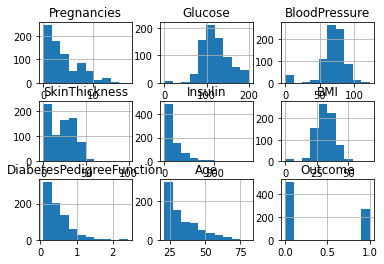

In [33]:
import matplotlib.pyplot as plt
data.hist()
plt.show()

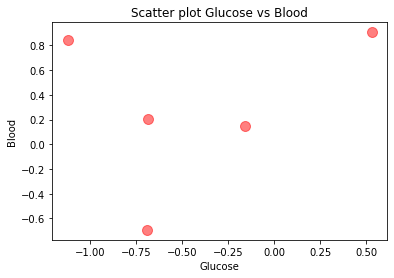

In [34]:
plt.scatter(x[1],x[0],s=100,c="red",alpha=0.5)
plt.title('Scatter plot Glucose vs Blood')
plt.xlabel('Glucose')
plt.ylabel('Blood')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X_trainset,X_testset,Y_trainset,Y_testset=train_test_split(x,y,test_size=0.3,random_state=4)


In [45]:

def DecisionTree():
    from sklearn.tree import DecisionTreeClassifier
    Y_true = DecisionTreeClassifier(criterion="entropy",max_depth=4)
    print(Y_true)

    Y_true.fit(X_trainset,Y_trainset)
    Y_pred = Y_true.predict(X_testset)
    print(Y_pred[0:5])

    #Evaluation
    from sklearn import metrics
    import matplotlib.pyplot as plt
    print("DecisionTrees ' s Accuracy: ", metrics.accuracy_score(Y_testset, Y_pred))
    print()
    print("Confusion Matrix of Decision tree:",metrics.confusion_matrix(Y_testset,Y_pred))

    import scikitplot as skplt
    skplt.metrics.plot_confusion_matrix(Y_testset,Y_pred)
    plt.show()
    print()
    print("Classification report:")
    print()
    print(metrics.classification_report(Y_testset,Y_pred))

    #Visualization
    import pydotplus
    import IPython.display
    import matplotlib.image as mpimg
    from sklearn import tree

    """featureNames = data.columns[0:5]
    targetNames = data["Outcome"].unique().tolist()
    out=tree.export_graphviz(Y_true,feature_names= featureNames,out_file=None,class_names=np.unique(Y_trainset),filled=True,special_characters=True,rotate=False)
    graph = pydotplus.graph_from_dot_data(out)"""
    
    #Precision Recall F1 Score plot
    p=metrics.classification_report(Y_testset,Y_pred,output_dict=True)
    p1=pd.DataFrame(p).transpose()
    print(p1)
    p1=p1.drop('support',1)
    print(p1)
    p1.plot.bar()
    plt.title('Decision Tree')
    plt.show()

    

DecisionTreeClassifier(criterion='entropy', max_depth=4)
[0 0 0 0 0]
DecisionTrees ' s Accuracy:  0.7965367965367965

Confusion Matrix of Decision tree: [[128  24]
 [ 23  56]]


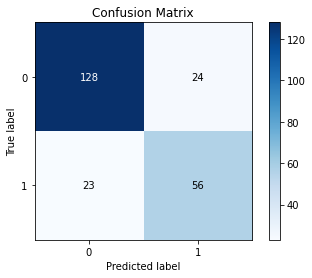


Classification report:

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       152
           1       0.70      0.71      0.70        79

    accuracy                           0.80       231
   macro avg       0.77      0.78      0.77       231
weighted avg       0.80      0.80      0.80       231

              precision    recall  f1-score     support
0              0.847682  0.842105  0.844884  152.000000
1              0.700000  0.708861  0.704403   79.000000
accuracy       0.796537  0.796537  0.796537    0.796537
macro avg      0.773841  0.775483  0.774644  231.000000
weighted avg   0.797176  0.796537  0.796841  231.000000
              precision    recall  f1-score
0              0.847682  0.842105  0.844884
1              0.700000  0.708861  0.704403
accuracy       0.796537  0.796537  0.796537
macro avg      0.773841  0.775483  0.774644
weighted avg   0.797176  0.796537  0.796841


C:\Users\ASHISH\AppData\Local\Temp/ipykernel_9696/3054303312.py:40: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  p1=p1.drop('support',1)


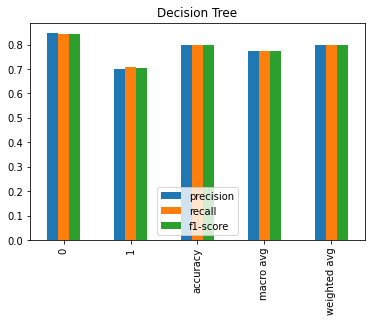

In [46]:
DecisionTree()

In [47]:
def KNN():
    from sklearn.neighbors import KNeighborsClassifier
    Y1_true= KNeighborsClassifier(n_neighbors=3)
    Y1_true.fit(X_trainset,Y_trainset)
    Y1_pred = Y1_true.predict(X_testset)
    print(Y1_pred[0:5])

    #Evaluation
    from sklearn import metrics
    import matplotlib.pyplot as plt
    print("KNeighbour ' s Accuracy: ", metrics.accuracy_score(Y_testset, Y1_pred))
    print("Confusion Matrix for KNeighbours:",metrics.confusion_matrix(Y_testset,Y1_pred))

    import scikitplot as skplt
    skplt.metrics.plot_confusion_matrix(Y_testset,Y1_pred)
    plt.show()

    print("Classification report:")
    print(metrics.classification_report(Y_testset,Y1_pred))


    #Precision Recall F1 Score plot
    p2=metrics.classification_report(Y_testset,Y1_pred,output_dict=True)
    p3=pd.DataFrame(p2).transpose()
    p3=p3.drop('support',1)
    print(p3)
    p3.plot.bar()
    plt.title('KNeighbours')
    plt.show()



[0 0 0 1 1]
KNeighbour ' s Accuracy:  0.7316017316017316
Confusion Matrix for KNeighbours: [[123  29]
 [ 33  46]]


C:\Users\ASHISH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


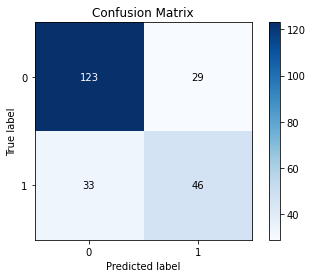

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       152
           1       0.61      0.58      0.60        79

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

              precision    recall  f1-score
0              0.788462  0.809211  0.798701
1              0.613333  0.582278  0.597403
accuracy       0.731602  0.731602  0.731602
macro avg      0.700897  0.695745  0.698052
weighted avg   0.728569  0.731602  0.729859


C:\Users\ASHISH\AppData\Local\Temp/ipykernel_9696/3954237981.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  p3=p3.drop('support',1)


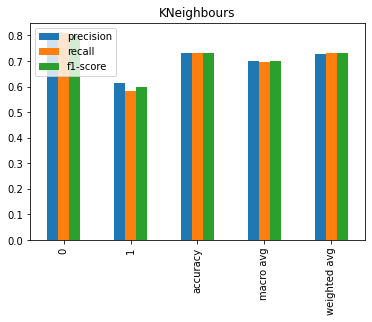

In [48]:
KNN()

In [49]:
def randomforest():
    from sklearn.ensemble import RandomForestClassifier
    Y1_true = RandomForestClassifier(n_estimators=20,max_depth=5,max_features=1)
    Y1_true.fit(X_trainset,Y_trainset)
    Y1_pred = Y1_true.predict(X_testset)
    print(Y1_pred[0:5])


    #Evaluation
    from sklearn import metrics
    import matplotlib.pyplot as plt
    print("RandomForest' s Accuracy: ", metrics.accuracy_score(Y_testset, Y1_pred))
    print("Confusion Matrix of Random Matrix:",metrics.confusion_matrix(Y_testset,Y1_pred))

    import scikitplot as skplt
    skplt.metrics.plot_confusion_matrix(Y_testset,Y1_pred)
    plt.show()

    print("Classification report:")
    print(metrics.classification_report(Y_testset,Y1_pred))


    #Precision Recall F1 Score plot
    p4=metrics.classification_report(Y_testset,Y1_pred,output_dict=True)
    p5=pd.DataFrame(p4).transpose()
    print(p5)
    p5=p5.drop('support',1)
    print(p5)
    p5.plot.bar()
    plt.title('Randomforest')
    plt.show()


[0 0 0 1 0]
RandomForest' s Accuracy:  0.7748917748917749
Confusion Matrix of Random Matrix: [[134  18]
 [ 34  45]]


C:\Users\ASHISH\AppData\Local\Temp/ipykernel_9696/380389884.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Y1_true.fit(X_trainset,Y_trainset)


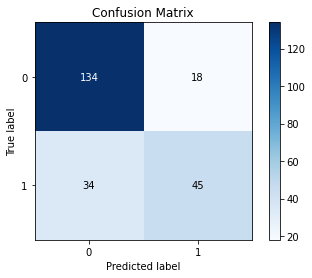

C:\Users\ASHISH\AppData\Local\Temp/ipykernel_9696/380389884.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  p5=p5.drop('support',1)


Classification report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       152
           1       0.71      0.57      0.63        79

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231

              precision    recall  f1-score     support
0              0.797619  0.881579  0.837500  152.000000
1              0.714286  0.569620  0.633803   79.000000
accuracy       0.774892  0.774892  0.774892    0.774892
macro avg      0.755952  0.725600  0.735651  231.000000
weighted avg   0.769120  0.774892  0.767837  231.000000
              precision    recall  f1-score
0              0.797619  0.881579  0.837500
1              0.714286  0.569620  0.633803
accuracy       0.774892  0.774892  0.774892
macro avg      0.755952  0.725600  0.735651
weighted avg   0.769120  0.774892  0.767837


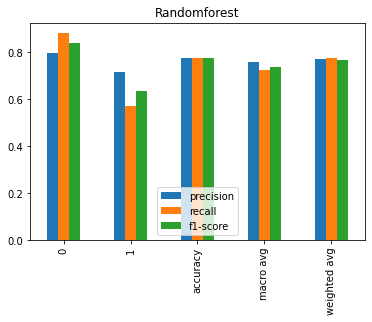

In [50]:
randomforest()

In [57]:
def allthree():
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    classifiers =[DecisionTreeClassifier(),KNeighborsClassifier(3),RandomForestClassifier()]
    log_cols = ["Classifier","Accuracy","Log Loss"]
    log = pd.DataFrame(columns=log_cols)
    i=0

    from sklearn.metrics import accuracy_score
    from sklearn.metrics import log_loss
    for clf in classifiers:
        clf.fit(X_trainset,Y_trainset)
        name = clf.__class__.__name__
        print("=" * 30)
        print(name)
        print('****Results****')
        train_predictions = clf.predict(X_testset)
        acc = accuracy_score(Y_testset,train_predictions)
        print("Accuracy: {:.4%}".format(acc))
        train_predictions = clf.predict_proba(X_testset)
        ll = log_loss(Y_testset, train_predictions)#Error
        print("Log Loss: {}".format(ll))
        log_entry = pd.DataFrame([[name, acc * 100, ll]], columns=log_cols)
        log = log.append(log_entry)
    plt.hist(log)
    plt.show()

    import seaborn as sns
    sns.set_color_codes("muted")
    sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
    plt.xlabel('Accuracy %')
    plt.title('Classifier Accuracy')
    plt.show()


DecisionTreeClassifier
****Results****
Accuracy: 69.6970%
Log Loss: 10.466295877245662
KNeighborsClassifier
****Results****
Accuracy: 73.1602%
Log Loss: 2.8716772676999374
RandomForestClassifier
****Results****
Accuracy: 73.5931%
Log Loss: 0.4929738948123885


C:\Users\ASHISH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASHISH\AppData\Local\Temp/ipykernel_9696/2431145908.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_trainset,Y_trainset)


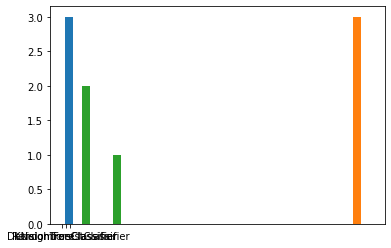

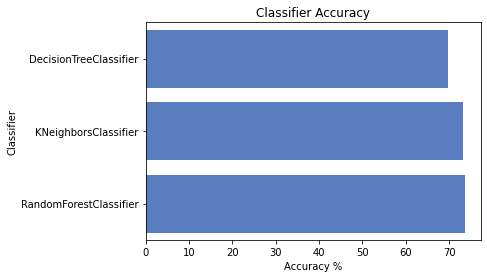

In [58]:
allthree()